# 逻辑回归
## 线性回归
逻辑回归，是一种名为“回归”的线性分类器，其本质是由线性回归变化而来的，一种广泛使用于分类问题中的广义回归算法。要理解逻辑回归，得要先理解线性回归。线性回归是机器学习中最简单的的回归算法，它方程如下:
$$z = \theta_0+\theta_1+\theta_2+...+\theta_n$$
$\theta$被统称为模型的参数，其中$\theta_0$被称为截距(intercept)， $\theta_1$~$\theta_n$ 被称为系数(coefficient)。可以使用矩阵来表示这个方程，其中x和 都可以被看做是一个列矩阵，则有:
$$z = [\theta_0,\theta_1,...,\theta_n] * \left[
 \begin{matrix}
   x_0  \\
   x_1 \\
   ...   \\
   x_n
  \end{matrix}
  \right] \tag{3} =\theta^Tx (x_0=1)$$
线性回归的任务，就是构造一个预测函数来映射输入的特征矩阵x和标签值y的线性关系，而构造预测函数的核心 就是找出模型的参数: $\theta$，著名的最小二乘法就是用来求解线性回归中参数的数学方法。
 
通过函数 ，线性回归使用输入的特征矩阵X来输出一组连续型的标签值y_pred，以完成各种预测连续型变量的任务 (比如预测产品销量，预测股价等等)。那如果标签是离散型变量，尤其是，如果是满足0-1分布的离散型 变量，该如何处理?

可以通过引入联系函数，将线性回归方程z变换为g(z)，并且令g(z)的值 分布在(0,1)之间，且当g(z)接近0时样本的标签为类别0，当g(z)接近1时样本的标签为类别1，这样就得到了一个分类模型。而这个联系函数对于逻辑回归来说，就是Sigmoid函数:
$$g(z) = \frac{1}{1+e^{-z}}$$
线性回归中$z = \theta^Tx$，将z带入，就得到了二元逻辑回归模型的一般形式:
$$g(z) = y(x) = \frac{1}{1+e^{-\theta^Tx}} $$

In [1]:
#sigmod图像
import numpy as np
import matplotlib.pyplot as plt
import math
x = np.arange(-10,10,0.01)
y = 1/(1+np.power(math.e,-x))
plt.figure(figsize=(15,3))
plt.plot(x,y)
plt.show()

<Figure size 1500x300 with 1 Axes>

### 为什么需要逻辑回归
线性回归对数据的要求很严格，比如标签必须满足正态分布，特征之间的多重共线性需要消除等等，而现实中很多真实情景的数据无法满足这些要求，因此线性回归在很多现实情境的应用效果有限。逻辑回归是由线性回归变化而来，因此它对数据也有一些要求，而之前已经学过了分类模型决策树和随机森林，它们的分类效力很强，并且不需要对数据做任何预处理。  
另外，逻辑回归的原理其实并不简单。一个人要理解逻辑回归，必须要有一定的数学基础，必须理解损失函数，正则化，梯度下降，海森矩阵等等这些复杂的概念，才能够对逻辑回归进行调优。况且，要计算概率，朴素贝叶斯可以计算出真正意义上的概率，要进行分类，机器学习中能够完成二分类功能的模型简直多如牛毛。因此，在数据挖掘，人工智能所涉及到的医疗，教育，人脸识别，语音识别这些领域，逻辑回归没有太多的出场机会。  
但是，无论机器学习领域如何折腾，逻辑回归依然是一个受工业商业热爱，使用广泛的模型，因为它有着不可替代的优点:
1. 逻辑回归对线性关系的拟合效果很好，特征与标签之间的线性关系极强的数据，比如金融领域中的 信用卡欺诈，评分卡制作，电商中的营销预测等等相关的数据，都是逻辑回归的强项。虽然现在有了梯度提 升树GDBT，比逻辑回归效果更好，也被许多数据咨询公司启用，但逻辑回归在金融领域，尤其是银行业中的 统治地位依然不可动摇(相对的，逻辑回归在非线性数据的效果很多时候比瞎猜还不如，如果已经知 道数据之间的联系是非线性的，千万不要迷信逻辑回归)
2. 逻辑回归计算快:对于线性数据，逻辑回归的拟合和计算都非常快，计算效率优于SVM和随机森林
3. 逻辑回归返回的分类结果不是固定的0，1，而是以小数形式呈现的类概率数字：因此可以把逻辑回归返回的结果当成连续型数据来利用。比如在评分卡制作时，不仅需要判断客户是否会违约，还需要给出确 定的”信用分“，而这个信用分的计算就需要使用类概率计算出的对数几率，而决策树和随机森林这样的分类 器，可以产出分类结果，却无法计算分数。
4. 在小数据集上，逻辑回归的表现更好。而在大型数据集上，基于树的集成模型表现会更好
最后，逻辑回归是一个返回对数几率的，在线性数据上表现优异的分类器，它主要被应 用在金融领域。其数学目的是求解能够让模型对数据拟合程度最高的参数 的值，以此构建预测函数$y(x)$ ，然后将 特征矩阵输入预测函数来计算出逻辑回归的结果y。注意，虽然逻辑回归通常被用于处理二分类问题，但逻辑回归也可以做多分类。

### sklearn中的逻辑回归
- linear_model.LogisticRegression 逻辑回归分类器(又叫logit回归，最大熵分类器)
- linear_model.LogisticRegressionCV 带交叉验证的逻辑回归分类器


### linear_model.LogisticRegression
sklearn.linear_model.LogisticRegression (penalty=’l2’, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver=’warn’, max_iter=100, multi_class=’warn’, verbose=0, warm_start=False, n_jobs=None)

### 二元逻辑回归中的损失函数
#### 损失函数的概念
损失函数是一个数学函数，用来衡量参数为$\theta$的模型拟合训练集时产生的信息损失的大小，并以此衡量参数的优劣。如果用一组参数建模后，模型在训练集上表现良好，说明模型拟合过程中的损失很小，损失函数的值很小，这一组参数就优秀;相反，如果模型在训练集上表现糟糕，损失函数就会很大，模型就训练不 足，效果较差，这一组参数也就比较差。即是说，在求解参数 时，追求损失函数最小，让模型在训练数据上 的拟合效果最优，即预测准确率尽量靠近100%。  

所以，逻辑回归可以演变为求一组参数$\theta$，让损失函数的最小化过程。从而回到了熟悉的求函数极值的优化的数学问题上。

$$ J(\theta) = -\Sigma^{m}_{i=1}(y_i * log(y_\theta(x_i)) + (1-y_i)*log(1-y_\theta(x_i)) $$

其中，$\theta$表示求解出来的一组参数，m是样本的个数，$y_i$是样本i上真实的标签，$y_\theta(x_i)$是样本i上，基于参数$\theta$计算 出来的逻辑回归返回值，$x_i$是样本i各个特征的取值。而目标就是求解出使$J(\theta)$最小的$\theta$取值。注意，在逻辑 回归的本质函数y(x)里，特征矩阵x是自变量，参数是$\theta$。但在损失函数中，参数$\theta$是损失函数的自变量，x和y都是已 知的特征矩阵和标签，相当于是损失函数的参数。不同的函数中，自变量和参数各有不同。

由于求损失函数的最小值，让模型在训练集上表现最优，可能会引发另一个问题:如果模型在训练集上表示优秀，却在测试集上表现糟糕，模型就会过拟合。虽然逻辑回归和线性回归是天生欠拟合的模型，但还是需要控制过拟合的技术调整模型，对逻辑回归中过拟合的控制，通过正则化来实现。

### 重要参数penalty & C
#### 正则化

正则化是用来防止模型过拟合的过程，常用的有L1正则化和L2正则化两种选项，分别通过在损失函数后加上参数向 量 的L1范式和L2范式的倍数来实现。这个增加的范式，被称为“正则项”，也被称为"惩罚项"。损失函数改变，基于损失函数的最优化来求解的参数取值必然改变，以此来调节模型拟合的程度。其中L1范式表现为参数向量中 的每个参数的绝对值之和，L2范数表现为参数向量中的每个参数的平方和的开方值。
$$ J(\theta)_{L1} = C * J(\theta) + \Sigma^n_{j=1}|\theta_j|\qquad (j>=1) $$
$$ J(\theta)_{L2} = C * J(\theta) + \sqrt{\Sigma^n_{j=1}(\theta)^2} \qquad (j>=1)$$
其中$J(\theta)$是损失函数，C是用来控制正则化程度的超参数，n是方程中特征的总数，也是方程中参 数的总数，j代表每个参数。在这里，j要大于等于1，是因为参数向量 中，第一个参数是$\theta_0$，是截距，它通常是不参与正则化。

##### 参数说明
##### penalty 
    可以输入"l1"或"l2"来指定使用哪一种正则化方式，不填写默认"l2"。 注意，若选择"l1"正则化，参数solver仅能够使用求解方式”liblinear"和"saga“，若使用“l2”正则 化，参数solver中所有的求解方式都可以使用。
##### C
    C正则化强度的倒数，必须是一个大于0的浮点数，不填写默认1.0，即默认正则项与损失函数的 比值是1:1。C越小，损失函数会越小，模型对损失函数的惩罚越重，正则化的效力越强，参数$\theta$会逐渐被压缩得越来越小。

L1正则化和L2正则化虽然都可以控制过拟合，但它们的效果并不相同。当正则化强度逐渐增大(即C逐渐变小)， 参数$\theta$的取值会逐渐变小，但L1正则化会将参数压缩为0，L2正则化只会让参数$\theta$尽量小，不会取到0。

在L1正则化在逐渐加强的过程中，携带信息量小的、对模型贡献不大的特征的参数，会比携带大量信息的、对模型 有巨大贡献的特征的参数更快地变成0，所以L1正则化本质是一个特征选择的过程，掌管了参数的“稀疏性”。L1正 则化越强，参数向量中就越多的参数为0，参数就越稀疏，选出来的特征就越少，以此来防止过拟合。因此，如果 特征量很大，数据维度很高，会倾向于使用L1正则化。由于L1正则化的这个性质，逻辑回归的特征选择可以由 Embedded嵌入法来完成。

相对的，L2正则化在加强的过程中，会尽量让每个特征对模型都有一些小的贡献，但携带信息少，对模型贡献不大 的特征的参数会非常接近于0。通常来说，如果主要目的只是为了防止过拟合，选择L2正则化就足够了。但 是如果选择L2正则化后还是过拟合，模型在未知数据集上的效果表现很差，就可以考虑L1正则化。

而两种正则化下C的取值，都可以通过学习曲线来进行调整。

In [2]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
data = load_breast_cancer()
X = data.data
y = data.target
data.data.shape
lrl1 = LR(penalty="l1",solver="liblinear",C=0.5,max_iter=1000)
lrl2 = LR(penalty="l2",solver="liblinear",C=0.5,max_iter=1000)
#逻辑回归的重要属性coef_，查看每个特征所对应的参数 
lrl1 = lrl1.fit(X,y)
print(lrl1.coef_)
print((lrl1.coef_ != 0).sum(axis=1))


[[ 3.98419841  0.03147731 -0.13500055 -0.01618882  0.          0.
   0.          0.          0.          0.          0.          0.50330075
   0.         -0.07123377  0.          0.          0.          0.
   0.          0.          0.         -0.2452783  -0.12819094 -0.01443973
   0.          0.         -2.05962068  0.          0.          0.        ]]
[10]


In [3]:
lrl2 = lrl2.fit(X,y)
lrl2.coef_

array([[ 1.61520498e+00,  1.03165077e-01,  4.89949912e-02,
        -4.54501839e-03, -9.48008442e-02, -3.01421091e-01,
        -4.56859977e-01, -2.23258644e-01, -1.36553775e-01,
        -1.93906452e-02,  1.51863698e-02,  8.84898768e-01,
         1.16165402e-01, -9.44763010e-02, -9.89655843e-03,
        -2.29725881e-02, -5.65958129e-02, -2.71050978e-02,
        -2.78528014e-02,  3.23039398e-04,  1.25588920e+00,
        -3.02228846e-01, -1.72470625e-01, -2.21057469e-02,
        -1.74443731e-01, -8.78235976e-01, -1.16396035e+00,
        -4.29422429e-01, -4.23200446e-01, -8.69294093e-02]])

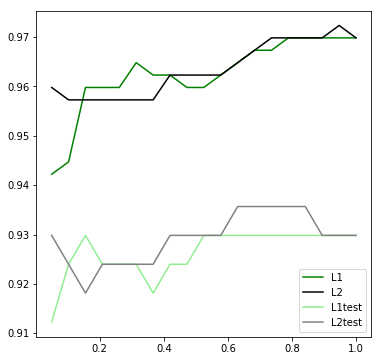

In [4]:
#l1 l2分别调参画学习曲线
l1 = []
l2 = []
l1test = []
l2test = []
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)
for i in np.linspace(0.05,1,19):
    lrl1 = LR(penalty="l1",solver="liblinear",C=i,max_iter=1000)
    lrl2 = LR(penalty="l2",solver="liblinear",C=i,max_iter=1000)
    lrl1 = lrl1.fit(Xtrain,Ytrain)
    l1.append(accuracy_score(lrl1.predict(Xtrain),Ytrain))
    l1test.append(accuracy_score(lrl1.predict(Xtest),Ytest))
    lrl2 = lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))
graph = [l1,l2,l1test,l2test]
color = ["green","black","lightgreen","gray"]
label = ["L1","L2","L1test","L2test"]
plt.figure(figsize=(6,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1,19),graph[i],color[i],label=label[i]) 
plt.legend(loc=4) 
plt.show()

### 逻辑回归中的特征工程
- 业务选择
- PCA和SVD一般不用
- 推荐使用潜入法
由于L1正则化会使得部分特征对应 的参数为0，因此L1正则化可以用来做特征选择，结合嵌入法的模块SelectFromModel，可以很容易就筛选出 让模型十分高效的特征。注意，此时的目的是，尽量保留原数据上的信息，让模型在降维后的数据上的拟合效果保持优秀，因此不考虑训练集测试集的问题，把所有的数据都放入模型进行降维

In [5]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
data = load_breast_cancer()
data.data.shape

(569, 30)

In [6]:
LR_ = LR(solver="liblinear",C=0.9,random_state=420)
cross_val_score(LR_,data.data,data.target,cv=10).mean()
X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
X_embedded.shape

(569, 9)

In [7]:
cross_val_score(LR_,X_embedded,data.target,cv=10).mean()

0.9368323826808401

(0.0, 30)
(0.0, 17)
(0.0, 12)
(0.0, 11)
(0.0, 8)
(0.0, 8)
(0.0, 6)
(0.0, 5)
(0.0, 5)
(0.0, 5)
(0.0, 5)
(0.0, 4)
(0.0, 2)
(0.0, 2)
(0.0, 2)
(0.0, 1)
(0.0, 1)
(0.0, 1)
(0.0, 1)
(0.0, 1)


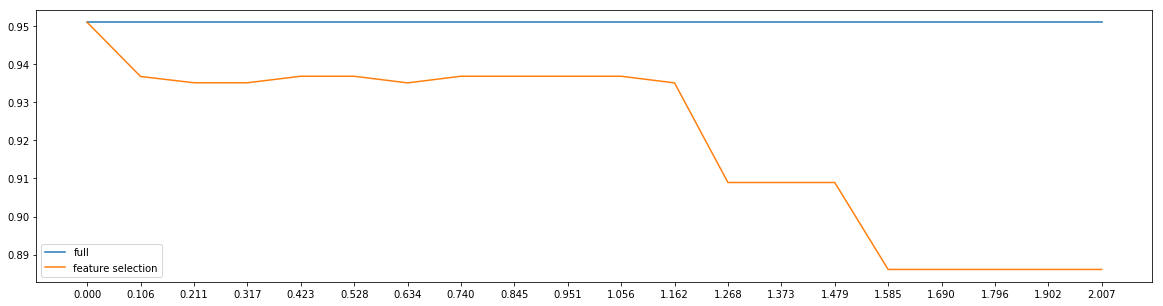

In [8]:
#基于L2的嵌入法
fullx = []
fsx = []
threshold = np.linspace(0,abs((LR_.fit(data.data,data.target).coef_)).max(),20)
k=0
for i in threshold:
    X_embedded = SelectFromModel(LR_,threshold=i).fit_transform(data.data,data.target)
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=5).mean())
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=5).mean())
    print((threshold[k],X_embedded.shape[1]))
k+=1
plt.figure(figsize=(20,5))
plt.plot(threshold,fullx,label="full")
plt.plot(threshold,fsx,label="feature selection")
plt.xticks(threshold)
plt.legend()
plt.show()

0.9563164376458386 7.01


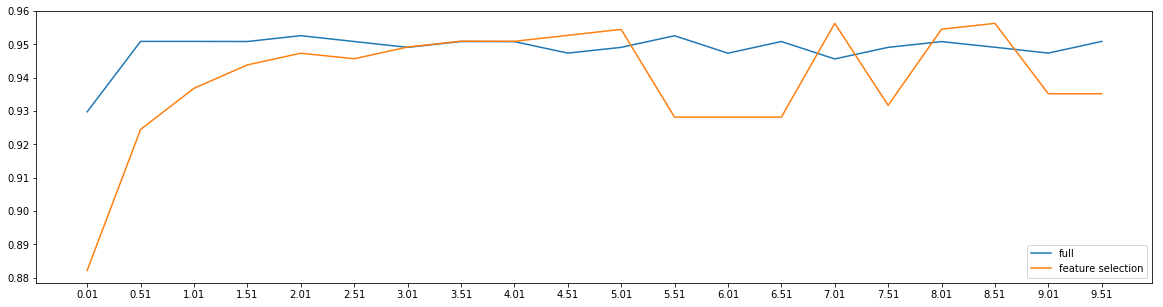

In [9]:
#尝试调整C
fullx = []
fsx = []
C=np.arange(0.01,10.01,0.5)
for i in C:
    LR_ = LR(solver="liblinear",C=i,random_state=420)
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=10).mean())
    X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=10).mean())
print(max(fsx),C[fsx.index(max(fsx))])
plt.figure(figsize=(20,5))
plt.plot(C,fullx,label="full")
plt.plot(C,fsx,label="feature selection")
plt.xticks(C)
plt.legend()
plt.show()

0.9580405755768732 6.104999999999999


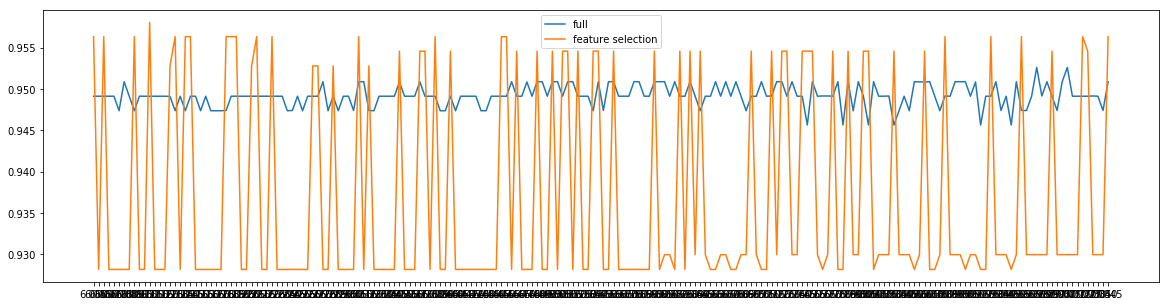

0.9491152450090743
0.9580405755768732


(569, 11)

In [10]:
#继续细化学习曲线
fullx = []
fsx = []
C=np.arange(6.05,7.05,0.005)
for i in C:
    LR_ = LR(solver="liblinear",C=i,random_state=420)
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=10).mean())
    X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=10).mean())
print(max(fsx),C[fsx.index(max(fsx))])
plt.figure(figsize=(20,5))
plt.plot(C,fullx,label="full")
plt.plot(C,fsx,label="feature selection")
plt.xticks(C)
plt.legend()
plt.show()
#验证模型效果:降维之前
LR_ = LR(solver="liblinear",C=6.104999999999999,random_state=420) 
print(cross_val_score(LR_,data.data,data.target,cv=10).mean())
#验证模型效果:降维之后
LR_ = LR(solver="liblinear",C=6.104999999999999,random_state=420)
X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target) 
print(cross_val_score(LR_,X_embedded,data.target,cv=10).mean())
X_embedded.shape


### 梯度下降:重要参数max_iter
逻辑回归的数学目的是求解能够让模型最优化，拟合程度最好的参数 的值，即求解能够让损失函数$J(\theta)$最小化的 值。对于二元逻辑回归来说，有多种方法可以用来求解参数 ，最常见的有梯度下降法(Gradient Descent)，坐标下 降法(Coordinate Descent)，牛顿法(Newton-Raphson method)等，其中又以梯度下降法最为著名。每种方法都 涉及复杂的数学原理，但这些计算在执行的任务其实是类似的。
#### 梯度下降求解逻辑回归
基于梯度下降的方式，进行逐步下降。
- 梯度
- 步长
- 迭代次数

在逻辑回归中，损失函数如下：
$$ J(\theta) = -\Sigma^{m}_{i=1}(y_i * log(y_\theta(x_i)) + (1-y_i)*log(1-y_\theta(x_i)) $$
对该函数的自变量$\theta$求偏导数，就可以得到梯度向量在第j组$\theta$的坐标点上的表示形式：
$$ \frac{\partial}{\partial\theta_j}J(\theta) = d_j = \Sigma_{i=1j}^m(y_\theta(x_i)-y_i)x_{ij} $$
在这个公式下，只要给定一组$\theta$的$\theta_j$取值 ，再带入特征矩阵x，就可以求得这一组$\theta$取值下的预测结果$y_\theta(x_i)$，结合真实标签向量y，就可以获得这一组$\theta_j$取值下的梯度向量，其大小表示为d_j。现在的目的是在可能的$\theta$取值上进行遍历，一次次计算梯度向量，并在梯度向量的反方向上让损失函数J下降至最小值。在这个过程中，我 们的$\theta$和梯度向量的大小d都会不断改变，而遍历$\theta$的过程可以描述为:
$$\theta_{j+1} = \theta_j - \alpha*d_j = \theta_j - \alpha * \Sigma_{i=1}^m(y_\theta(x_i)-y_i)x_{ij}$$
其中$\theta_{j+1}$是第j次迭代后的参数向量，$\theta_j$是第j次迭代时的参数向量，$\alpha$被称为步长，控制着每走一步(每迭代一 次)后$\theta$的变化，并以此来影响每次迭代后的梯度向量的大小和方向。

思考：步长对于求损失函数最小值的影响

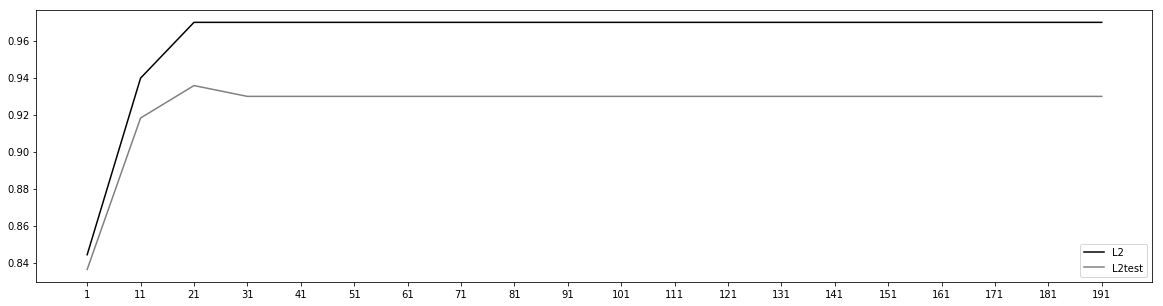

array([24], dtype=int32)

In [11]:
l2 = []
l2test = []
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)
for i in np.arange(1,201,10):
    lrl2 = LR(penalty="l2",solver="liblinear",C=0.9,max_iter=i)
    lrl2 = lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))
graph = [l2,l2test]
color = ["black","gray"]
label = ["L2","L2test"]
plt.figure(figsize=(20,5))
for i in range(len(graph)):
    plt.plot(np.arange(1,201,10),graph[i],color[i],label=label[i])
plt.legend(loc=4)
plt.xticks(np.arange(1,201,10))
plt.show()
#可以使用属性.n_iter_来调用本次求解中真正实现的迭代次数
lr = LR(penalty="l2",solver="liblinear",C=0.9,max_iter=300).fit(Xtrain,Ytrain)
lr.n_iter_

#### 当max_iter中限制的步数已经走完了，逻辑回归却还没有找到损失函数的最小值，参数$\theta$的值还没有被收敛， sklearn就会弹出这样的红色警告:
这是在提醒: 参数没有收敛，请增大max_iter中输入的数 字。但不一定要听sklearn的。max_iter很大，意味着步长小，模型运行得会更加缓慢。虽然在梯度下降 中追求的是损失函数的最小值，但这也可能意味着模型会过拟合(在训练集上表现得太好，在测试集上却不 一定)，因此，如果在max_iter报红条的情况下，模型的训练和预测效果都已经不错了，那就不需要再增大 max_iter中的数目了，毕竟一切都以模型的预测效果为基准——只要最终的预测效果好，运行又快，那就一切都好，无所谓是否报红色警告了。

### 二元回归与多元回归:重要参数solver & multi_class
sklearn提供了多种可以使用逻辑回归处理多分类问题的选项。可以把某种分类类型都看作1，其余的分类类型都为0值，和”数据预处理“中的二值 化的思维类似，这种方法被称为"一对多"(One-vs-rest)，简称OvR，在sklearn中表示为“ovr"。又或者，可以把 好几个分类类型划为1，剩下的几个分类类型划为0值，这是一种”多对多“(Many-vs-Many)的方法，简称MvM，在 sklearn中表示为"Multinominal"。每种方式都配合L1或L2正则项来使用。
在sklearn中，使用参数multi_class来告诉模型，预测标签是什么样的类型。
#### multi_class
输入"ovr", "multinomial", "auto"来告知模型，要处理的分类问题的类型。默认是"ovr"。
- 'ovr':表示分类问题是二分类，或让模型使用"一对多"的形式来处理多分类问题。
- 'multinomial':表示处理多分类问题，这种输入在参数solver是'liblinear'时不可用。
- "auto":表示会根据数据的分类情况和其他参数来确定模型要处理的分类问题的类型。比如说，如果数据是二分 类，或者solver的取值为"liblinear"，"auto"会默认选择"ovr"。反之，则会选择"nultinomial"。

注意:默认值将在0.22版本中从"ovr"更改为"auto"。

#### solver
之前提到的梯度下降法，只是求解逻辑回归参数 的一种方法，并且只讲解了求解二分类变量的参数时的各种原理。sklearn提供了多种选择进行最优参数求解。求解器的选择，由参数"solver"控制，共有五种选择。其中“liblinear”是二分类专用，也是现在的默认求解器。
- liblinear 坐标下降法 会惩罚截距，不适用multinomial
- lbfgs 拟牛顿法的一种，利用损失函数的二阶导数矩阵（海森矩阵）来迭代优化损失函数
- newton-cg 拟牛顿法的一种，利用损失函数的二阶导数矩阵（海森矩阵）来迭代优化损失函数
- sag 随机平均梯度下降，与普通梯度下降的区别是每次迭代仅仅用一部分的样本来计算梯度
- saga 随机平均梯度下降的进化，稀疏多项逻辑回归的首选

In [12]:
#看看鸢尾花数据集上，multinomial和ovr的区别
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris = load_iris()
for multi_class in ('multinomial', 'ovr'):
    clf = LogisticRegression(solver='sag', max_iter=100, random_state=42,multi_class=multi_class).fit(iris.data, iris.target)
    print("training score : %.3f (%s)" % (clf.score(iris.data, iris.target), multi_class))
#对于多分类问题，应该优先使用multinomial


training score : 0.987 (multinomial)
training score : 0.960 (ovr)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


### 不平衡数据处理
#### class_weight 不建议使用
sklearn当中的参数class_weight变幻莫测，用模型跑一跑就会发现，很难去找出这个参数引导的模 型趋势，或者画出学习曲线来评估参数的效果，因此非常难用。对于处理样本不均衡的各种方法，其中主流的是采样法，是通过重复样本的方式来平衡标签，可以进行上采样(增加少数类的样本)，比如SMOTE， 或者下采样(减少多数类的样本)。对于逻辑回归来说，上采样是最好的办法。